# Plant Seedlings Classification

![](plant1.jpg)

### Contents
* [**Abstract**](#abstract)
* [**Dataset**](#dataset)
* [**Importing Dataset and the required libraries**](#import)

* [**Classification Algorithms using Neural Networks**](#part-b)
    * [Setting the model architecture](#arch)
    * [Evaluating the deployment of the architectures](#eval)
    * [Getting prediction on validation set](#pred)
    * [Creating Confusion Matrix](#conf)
    * [Plotting the Loss and Accuracy on the Training and Validation set](#plot)
    
* [**Conclusion**](#conclusion)

<a id = 'abstract'></a>
### Abstract

Agriculture is very important to human continued existence and remains a key driver of many economies worldwide, especially in underdeveloped and developing economies. There is an increasing demand for food and cash crops, due to the increasing in world population and the challenges enforced by climate modifications, there is an urgent need to increase plant production while reducing costs. Preceding instrument vision methods established for selective weeding have confronted with major challenges for trustworthy and precise weed recognition. In this project, plant seedlings classification approach is presented with a dataset that contains approximately 5,000 images with 960 unique plants that belong to 12 species at a few developing phases. Convolutional Neural Network (CNN) algorithms, a deep learning technique extensively applied to image recognition was used, for this task. The results found that CNN-driven seedling classification applications when used in farming automation have the latent to enhance crop harvest and improve output and productivity when designed properly. The trained model achieved an accuracy of 99.48% on a held-out test set, demonstrating the feasibility of this approach. 

<a id = 'dataset'></a>
### Dataset
The dataset which is used in this project, is collected from Kaggle. Here is the link of the dataset : https://www.kaggle.com/vbookshelf/v2-plant-seedlings-dataset

<a id = 'import'></a>
### Importing the Dataset and the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import itertools
import time
import copy

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        seed = 123
np.random.seed(seed)
def show_plots(history, plot_title=None, fig_size=None):
    """ Useful function to view plot of loss values & accuracies across the various epochs
        Works with the history object returned by the train_model(...) call """
    assert type(history) is dict
    # NOTE: the history object should always have loss & acc (for training data), but MAY have
    # val_loss & val_acc for validation data
    loss_vals = history['loss']
    val_loss_vals = history['val_loss'] if 'val_loss' in history.keys() else None
    epochs = range(1, len(history['loss']) + 1)

    f, ax = plt.subplots(nrows=1, ncols=2, figsize=((16, 4) if fig_size is None else fig_size))

    # plot losses on ax[0]
    ax[0].plot(epochs, loss_vals, color='navy', marker='o', linestyle=' ', label='Training Loss')
    if val_loss_vals is not None:
        ax[0].plot(epochs, val_loss_vals, color='firebrick', marker='*', label='Validation Loss')
        ax[0].set_title('Training & Validation Loss')
        ax[0].legend(loc='best')
    else:
        ax[0].set_title('Training Loss')

    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].grid(True)

    # plot accuracies
    acc_vals = history['acc']  if 'acc' in history.keys() else None
    val_acc_vals = history['val_acc'] if 'val_acc' in history.keys() else None
    if acc_vals is not None:
        ax[1].plot(epochs, acc_vals, color='navy', marker='o', ls=' ', label='Training Accuracy')
    if val_acc_vals is not None:
        ax[1].plot(epochs, val_acc_vals, color='firebrick', marker='*', label='Validation Accuracy')
        ax[1].set_title('Training & Validation Accuracy')
        ax[1].legend(loc='best')
    else:
        ax[1].set_title('Training Accuracy')

    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].grid(True)

    if plot_title is not None:
        plt.suptitle(plot_title)

    plt.show()
    plt.savefig("metrics.png")
    plt.close()

    # delete locals from heap before exiting (to save some memory!)
    del loss_vals, epochs
    if val_loss_vals is not None:
        del val_loss_vals

**Preparing the Training and Testing Dataset for the model**

In [2]:
import shutil
path = '/dataset'
shutil.os.mkdir(path)

In [3]:
path = '/dataset/train'
shutil.os.mkdir(path)

In [4]:
path = '/dataset/train/'
data_dir = '../input/v2-plant-seedlings-dataset/'
def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)
copytree(data_dir, path)

In [ ]:
print(os.listdir(path))

In [5]:
shutil.rmtree('/dataset/train/nonsegmentedv2')

<a id="part-b"></a>
## Classification Algorithms using Neural Networks
A classification model tries to draw some conclusion from the input values given for training. It will predict the class labels/categories for the new data.

A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature. Neural networks can adapt to changing input; so the network generates the best possible result without needing to redesign the output criteria. The concept of neural networks, which has its roots in artificial intelligence, is swiftly gaining popularity in the development of trading systems.

* **Convolution Neural Network of CNN**

In deep learning, a convolutional neural network (CNN/ConvNet) is a class of deep neural networks, most commonly applied to analyze visual imagery. Now when we think of a neural network we think about matrix multiplications but that is not the case with ConvNet. It uses a special technique called Convolution. Now in mathematics convolution is a mathematical operation on two functions that produces a third function that expresses how the shape of one is modified by the other.

Convolution Neural Networks comes with different architectures and each of them has it's advantages and disadvantages. Let's have a look at those architectures, which we are going to use in the model creation.

1. **AlexNet** : AlexNet is the name of a convolutional neural network (CNN) architecture, designed by Alex Krizhevsky in collaboration with Ilya Sutskever and Geoffrey Hinton, who was Krizhevsky's Ph.D. advisor. AlexNet competed in the ImageNet Large Scale Visual Recognition Challenge on September 30, 2012. The network achieved a top-5 error of 15.3%, more than 10.8 percentage points lower than that of the runner up. The original paper's primary result was that the depth of the model was essential for its high performance, which was computationally expensive, but made feasible due to the utilization of graphics processing units (GPUs) during training.


2. **ResNet** : ResNet, short for Residual Networks is a classic neural network used as a backbone for many computer vision tasks. This model was the winner of ImageNet challenge in 2015. The fundamental breakthrough with ResNet was it allowed us to train extremely deep neural networks with 150+layers successfully.


3. **Inception** : Inception v3 is a widely-used image recognition model that has been shown to attain greater than 78.1% accuracy on the ImageNet dataset. The model is the culmination of many ideas developed by multiple researchers over the years.


4. **MobileNet** : MobileNet model is a network model using depthwise separable convolution as its basic unit. Its depthwise separable convolution has two layers: depthwise convolution and point convolution.


5. **vgg** : VGG is a convolutional neural network model proposed by K.Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition” . The model achieves 92.7% top-5 test accuracy in ImageNet , which is a dataset of over 14 million images belonging to 1000 classes.


6. **DenseNet** : DenseNet is one of the new discoveries in neural networks for visual object recognition. DenseNet is quite similar to ResNet with some fundamental differences. ResNet uses an additive method (+) that merges the previous layer (identity) with the future layer, whereas DenseNet concatenates.


7. **SqueezeNet** : SqueezeNet is a convolutional neural network that employs design strategies to reduce the number of parameters, notably with the use of fire modules that "squeeze" parameters using 1x1 convolutions. Source: SqueezeNet: AlexNet-level accuracy with 50x fewer parameters and <0.5MB model size.

Let's implement them -

In [6]:
import torch
from torch import nn
import torch.nn.functional as F
import numpy as np
from torch import optim
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

**Preparing the models with proper architectures**

In [56]:
# Top level data directory. Here we assume the format of the directory conforms
#   to the ImageFolder structure
data_dir = '/dataset/train/'

# Models to choose from [inception, mobilenet, resnet, squeezenet, densenet, vgg, alexnet]
model_name = "resnet"

# Number of classes in the dataset
num_classes = 12

# Batch size for training
batch_size = 64

# Number of epochs to train for
num_epochs = 50

# Flag for feature extracting. When False, we finetune the whole model,
#   when True we only update the reshaped layer params
feature_extract = True

**Preparing the Transforms and dataset**

In [39]:
#Prepare transforms and dataset

if model_name == 'inception':
    #inception requires 299 cropped size
    batchsize = 64
    data_transforms = transforms.Compose([transforms.RandomRotation(30),
                                           transforms.RandomResizedCrop(299),
                                           transforms.RandomHorizontalFlip(),
                                           transforms.ToTensor(),
                                           transforms.Normalize([0.485, 0.456, 0.406],
                                                                [0.229, 0.224, 0.225])])
else:
    batchsize = 64
    data_transforms = transforms.Compose([transforms.RandomRotation(30),
                                           transforms.RandomResizedCrop(224),
                                           transforms.RandomHorizontalFlip(),
                                           transforms.ToTensor(),
                                           transforms.Normalize([0.485, 0.456, 0.406],
                                                                [0.229, 0.224, 0.225])])    

dataset = datasets.ImageFolder(data_dir, transform=data_transforms)

**Spliting the dataset into Training and Validation sets**

In [40]:
#Split dataset into training and validation sets
train_set, val_set = torch.utils.data.random_split(dataset, [4039, 1500])
print(len(train_set))

4039


**Loading the Training and Validation Dataset**

In [41]:
train_loader = torch.utils.data.DataLoader(train_set, batchsize, shuffle=True)
valid_loader = torch.utils.data.DataLoader(val_set, batchsize)
dataloaders_dict = {'train':train_loader, 'val':valid_loader}

**Checking if CUDA is available or, not!**

The NVIDIA CUDA® Deep Neural Network library (cuDNN) is a GPU-accelerated library of primitives for deep neural networks. It allows them to focus on training neural networks and developing software applications rather than spending time on low-level GPU performance tuning.

In [10]:
# check if CUDA is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

<a id = 'arch'></a>
### Setting the Model Architectures

1. ResNet
2. AlexNet
3. vgg
4. MobileNet
5. SqueezeNet
6. Inception
7. DenseNet

In [42]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    # Initialize these variables which will be set in this if statement. Each of these
    #   variables is model specific.
    model_ft = None
    input_size = 0

    if model_name == "resnet":
        """ Resnet18
        """
        model_ft = models.resnet18(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "alexnet":
        """ Alexnet
        """
        model_ft = models.alexnet(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "vgg":
        """ VGG11_bn
        """
        model_ft = models.vgg11_bn(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "mobilenet":
        """ mobilenet_v2
        """
        model_ft = models.mobilenet_v2(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[1].in_features
        model_ft.classifier[1] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "squeezenet":
        """ Squeezenet
        """
        model_ft = models.squeezenet1_0(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        model_ft.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
        model_ft.num_classes = num_classes
        input_size = 224

    elif model_name == "densenet":
        """ Densenet
        """
        model_ft = models.densenet121(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier.in_features
        model_ft.classifier = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "inception":
        """ Inception v3
        Be careful, expects (299,299) sized images and has auxiliary output
        """
        model_ft = models.inception_v3(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        # Handle the auxilary net
        num_ftrs = model_ft.AuxLogits.fc.in_features
        model_ft.AuxLogits.fc = nn.Linear(num_ftrs, num_classes)
        # Handle the primary net
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs,num_classes)
        input_size = 299

    else:
        print("Invalid model name, exiting...")
        exit()

    return model_ft, input_size

**Preparing the model to run**

In [57]:
# Initialize the model for this run
model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

# Print the model we just instantiated
print(model_ft)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

**Sending the model to GPU**

In [58]:
#Send the model to GPU
model_ft = model_ft.to(device)

# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.
params_to_update = model_ft.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Observe that all parameters are being optimized
#optimizer_ft = optim.Adam(params_to_update, lr=0.001)
optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)

Params to learn:
	 fc.weight
	 fc.bias


<a id = 'eval'></a>
### Evaluating the Deployment of the Architectures

In [14]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=100, is_inception=False):
    since = time.time()

    val_acc_history = []
    val_loss_history = []
    
    train_acc_history = []
    train_loss_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train
                    # mode we calculate the loss by summing the final output and the auxiliary output
                    # but in testing we only consider the final output.
                    if is_inception and phase == 'train':
                        # From https://discuss.pytorch.org/t/how-to-optimize-inception-model-with-auxiliary-classifiers/7958
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)                    
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                                        
                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)
                val_loss_history.append(epoch_loss)
            if phase == 'train':
                train_acc_history.append(epoch_acc)
                train_loss_history.append(epoch_loss)
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    history = {'loss':train_loss_history, 'acc':train_acc_history, 'val_loss':val_loss_history, 'val_acc':val_acc_history}
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model,history

In [59]:
criterion = nn.CrossEntropyLoss()
# Train and evaluate
model, history = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs, is_inception=(model_name=="inception"))

Epoch 0/49
----------
train Loss: 2.3538 Acc: 0.2062
val Loss: 2.1375 Acc: 0.3020

Epoch 1/49
----------
train Loss: 2.0040 Acc: 0.3721
val Loss: 1.9175 Acc: 0.3987

Epoch 2/49
----------
train Loss: 1.8292 Acc: 0.4387
val Loss: 1.7395 Acc: 0.4647

Epoch 3/49
----------
train Loss: 1.6932 Acc: 0.4932
val Loss: 1.6572 Acc: 0.5060

Epoch 4/49
----------
train Loss: 1.6029 Acc: 0.5184
val Loss: 1.5444 Acc: 0.5353

Epoch 5/49
----------
train Loss: 1.5114 Acc: 0.5491
val Loss: 1.4703 Acc: 0.5713

Epoch 6/49
----------
train Loss: 1.4715 Acc: 0.5553
val Loss: 1.4727 Acc: 0.5320

Epoch 7/49
----------
train Loss: 1.3930 Acc: 0.5821
val Loss: 1.3761 Acc: 0.5953

Epoch 8/49
----------
train Loss: 1.3552 Acc: 0.5910
val Loss: 1.3518 Acc: 0.5873

Epoch 9/49
----------
train Loss: 1.3362 Acc: 0.5967
val Loss: 1.3264 Acc: 0.5800

Epoch 10/49
----------
train Loss: 1.2958 Acc: 0.6115
val Loss: 1.2842 Acc: 0.6013

Epoch 11/49
----------
train Loss: 1.2765 Acc: 0.6110
val Loss: 1.2694 Acc: 0.6127

Ep

<a id = 'pred'></a>
### Getting all the predictions on the Validation Set

In [46]:
#getting all the predictions on the valid set
def eval_predict(model,dataloaders_dict, phase):
    model.eval()
    all_predict = torch.tensor([], device=device)
    all_labels = torch.tensor([], device=device)
    with torch.no_grad():
        for inputs, labels in dataloaders_dict[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_predict = torch.cat((all_predict, preds), 0)
            all_labels = torch.cat((all_labels, labels), 0)
    return all_predict, all_labels

phase = 'val'
y_pred,y_true = eval_predict(model, dataloaders_dict, phase)

y_pred = y_pred.cpu().numpy()
y_true = y_true.cpu().numpy()

<a id = 'conf'></a>
### Creating the Confusion-Matrix

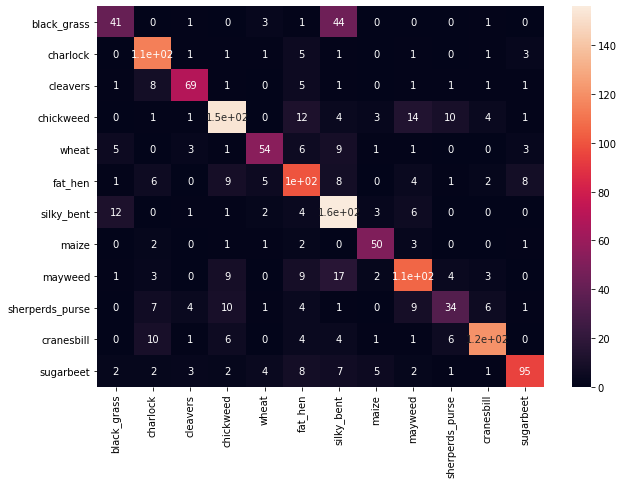

In [47]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
with open('confusion_matrix.npy', 'wb') as f:
    np.save(f, cnf_matrix)

#with open('test.npy', 'rb') as f:
#    a = np.load(f)
    
df_cm = pd.DataFrame(cnf_matrix, index = ["black_grass", "charlock","cleavers", "chickweed","wheat","fat_hen","silky_bent","maize","mayweed","sherperds_purse","cranesbill","sugarbeet"],
                  columns = ["black_grass", "charlock","cleavers", "chickweed","wheat","fat_hen","silky_bent","maize","mayweed","sherperds_purse","cranesbill","sugarbeet"])
plt.figure(figsize = (10,7))
plot = sns.heatmap(df_cm, annot=True)
fig = plot.get_figure()
fig.savefig("confusionmatrix.png")

<a id = 'plot'></a>
### Plotting the Loss and Accuracy on the Training and Validation set

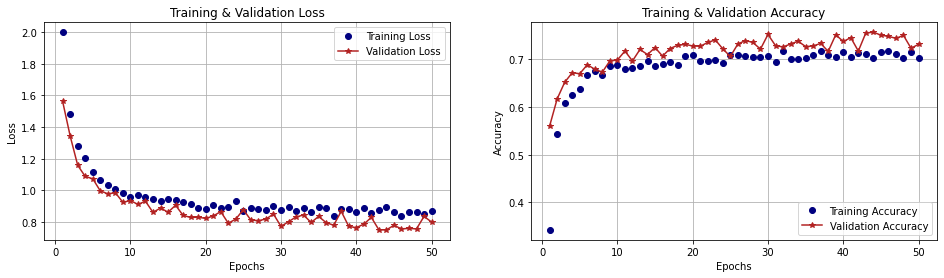

In [48]:
#Plot loss and accuracies
show_plots(history, plot_title=None, fig_size=None)

***********************************************

<a id = 'conclusion'></a>
### Conclusion

I have deployed seven Convolution Neural Network architectures for this Plant Seedlings Classification project. The model is successfully deployed and the accuracy of the model is checked using the accuracy score. CNN is one of the finest neural networks and the architectures are grading up the model to the higher extent.

After evaluating the architectures, the accuracy score of the architectures are shown below -

|Name of the Architecture|Best Accuracy Score|
|:---:|:---:|
|ResNet|0.69|
|AlexNet|0.69|
|MobileNet|0.67|
|vgg|0.68|
|DenseNet|0.67|
|SqueezeNet|0.67|
|Inception|0.68|

**Comparing all those scores scored by the deep learning algorithms, it is clear that ResNet and AlexNet architecture is having the upper hand in case of this dataset, than rest of the architectures of CNN.**

Best Fitted Models ranking - 
1. ResNet
2. AlexNet
3. Inception
4. VGG
5. MobileNet
6. DenseNet
7. SqueezeNet

Hooray!! The models are deployed successfully!


### Hope this project will help you! Thank you!